<a href="https://colab.research.google.com/github/faytroy/CSC-302_FINALS/blob/main/Final_Slide_2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-e7e45fd68c55>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



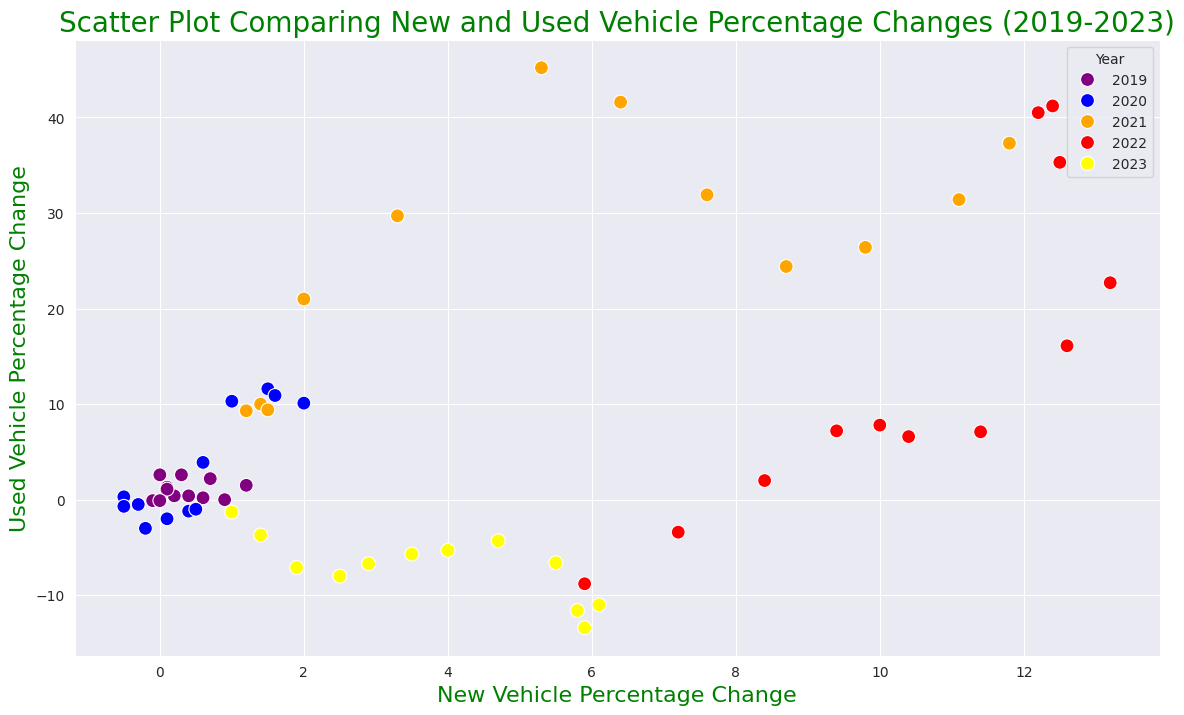

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

vehicle_data_yoy = pd.read_csv('/content/drive/MyDrive/New_Used_Vehicle_Prices.csv')

vehicle_data_yoy['Date'] = pd.to_datetime(vehicle_data_yoy['Date'])

filtered_data_yoy = vehicle_data_yoy[(vehicle_data_yoy['Date'].dt.year >= 2019) & (vehicle_data_yoy['Date'].dt.year <= 2023)] #assisted wtih A.I.

filtered_data_yoy['Year'] = filtered_data_yoy['Date'].dt.year #assisted wtih A.I.

custom_palette = {2019: "purple", 2020: "blue", 2021: "orange", 2022: "red", 2023: "yellow"} #assisted wtih A.I.

plt.figure(figsize=(14, 8)) #assisted wtih A.I.

sns.set_style("darkgrid") #assisted with A.I.

sns.scatterplot(data=filtered_data_yoy, x="New_Vehicle", y="Used_Vehicle", hue="Year", palette=custom_palette, s=100)

plt.title('Scatter Plot Comparing New and Used Vehicle Percentage Changes (2019-2023)', fontsize=20, color='green')
plt.xlabel('New Vehicle Percentage Change', fontsize=16, color='green')
plt.ylabel('Used Vehicle Percentage Change', fontsize=16, color='green')

plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/table_01_17_052623_r1.csv')

df_clean = df.drop(columns=['Unnamed: 4']).dropna() #assisted with A.I.

df_clean['Short_Sale_Lease_Type'] = df_clean['Sale_Lease_Type'].replace({ #assisted with A.I.
    'New_Vehicle_Sales_Passenger_Cars': 'Sales_Cars',
    'New_Vehicle_Sales_Light_Trucks': 'Sales_Trucks',
    'New_Vehicle_Leases_Passenger_Cars': 'Leases_Cars',
    'New_Vehicle_Leases_Light_Trucks': 'Leases_Trucks'
})

df_filtered = df_clean[df_clean['Year'].between(2019, 2022)]

fig = px.parallel_categories(df_filtered, dimensions=['Year', 'Short_Sale_Lease_Type'],
                             color='Number_Vehicles_Thousands',
                             color_continuous_scale=px.colors.sequential.Inferno)

fig.update_layout(title='Parallel Categories: Number of Vehicles by Sale/Lease Type (2019-2022)')

fig.show()

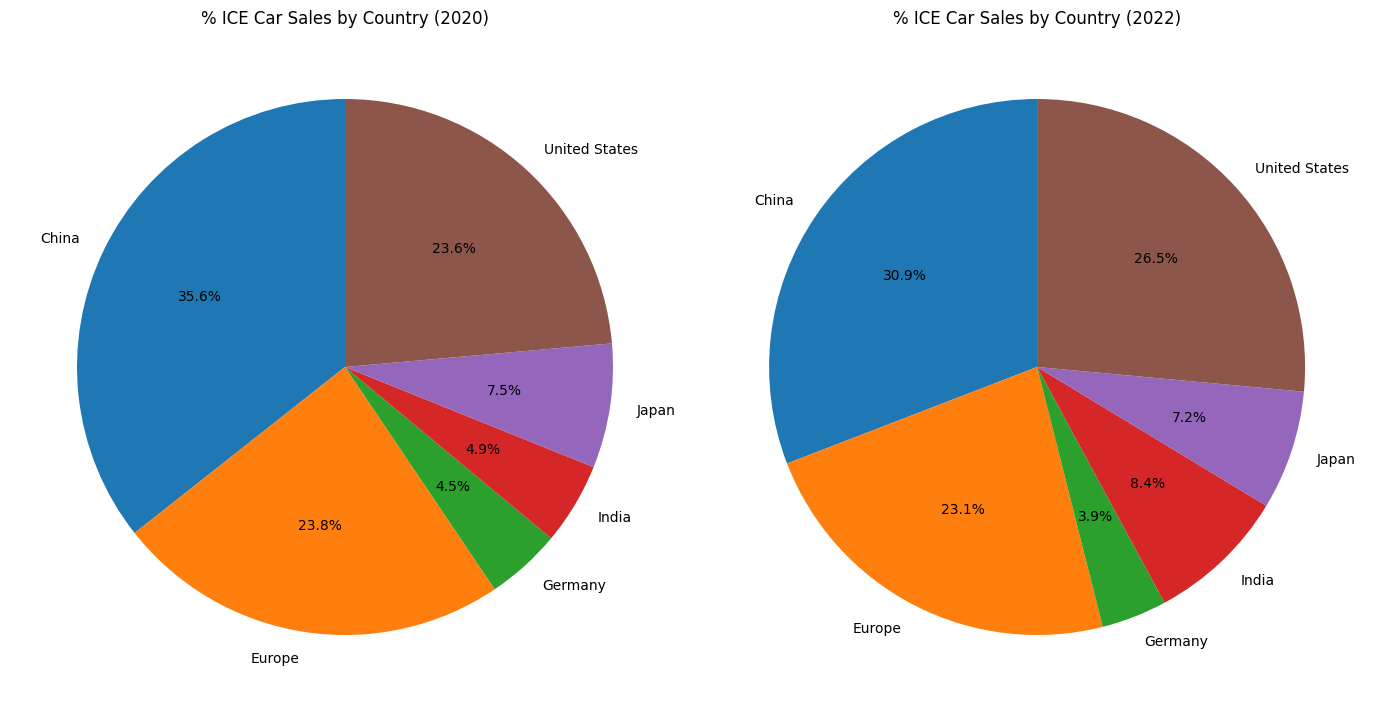

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/car-sales.csv'
car_sales_df_new = pd.read_csv(file_path)

countries = ['United States', 'China', 'Japan', 'Europe', 'India', 'Germany']
years = [2020, 2022]
filtered_data_pie = car_sales_df_new[(car_sales_df_new['Entity'].isin(countries)) &
                                     (car_sales_df_new['Year'].isin(years))]

data_2020_grouped = filtered_data_pie[filtered_data_pie['Year'] == 2020].groupby('Entity').sum() #assisted with A.I.

data_2022_grouped = filtered_data_pie[filtered_data_pie['Year'] == 2022].groupby('Entity').sum() # assisted wtih A.I.

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(data_2020_grouped['Non-electric car sales'], labels=data_2020_grouped.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('% ICE Car Sales by Country (2020)')

ax[1].pie(data_2022_grouped['Non-electric car sales'], labels=data_2022_grouped.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('% ICE Car Sales by Country (2022)')

plt.tight_layout() #assisted wtih A.I.

plt.show()
